In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 导入 MINST 数据集
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W1205 22:51:48.346101 140018005866240 deprecation.py:323] From <ipython-input-2-1a322f673d30>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W1205 22:51:48.346867 140018005866240 deprecation.py:323] From /home/lx/anaconda3/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W1205 22:51:48.347997 140018005866240 deprecation.py:323] From /home/lx/anaconda3/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future vers

Extracting MNIST_data/train-images-idx3-ubyte.gz


W1205 22:51:48.601552 140018005866240 deprecation.py:323] From /home/lx/anaconda3/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W1205 22:51:48.609033 140018005866240 deprecation.py:323] From /home/lx/anaconda3/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W1205 22:51:48.752109 140018005866240 deprecation.py:323] From /home/lx/anaconda3/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is depre

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# 网络模型参数
learning_rate = 0.01
n_hidden_1 = 256 # 第一层256个节点
n_hidden_2 = 128 # 第二层128个节点
n_input = 784 # MNIST data 输入 (img shape: 28*28)

# 占位符
x = tf.placeholder("float", [None, n_input])#输入
y = x #输出

In [4]:
#学习参数
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.zeros([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.zeros([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.zeros([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.zeros([n_input])),
}

In [5]:
# 编码
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2


# 解码
def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),biases['decoder_b2']))
    return layer_2

In [6]:
#输出的节点
encoder_out = encoder(x)
pred = decoder(encoder_out)

# 使用平方差为cost
cost = tf.reduce_mean(tf.pow(y - pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)


W1205 22:52:30.932600 140018005866240 deprecation.py:323] From /home/lx/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1205 22:52:30.998251 140018005866240 deprecation.py:506] From /home/lx/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# 训练参数
training_epochs = 20  #一共迭代20次
batch_size = 256     #每次取256个样本
display_step = 5     #迭代5次输出一次信息


Epoch: 0001 cost= 0.248036265
Epoch: 0006 cost= 0.158635467
Epoch: 0011 cost= 0.137420550
Epoch: 0016 cost= 0.123576835
完成!


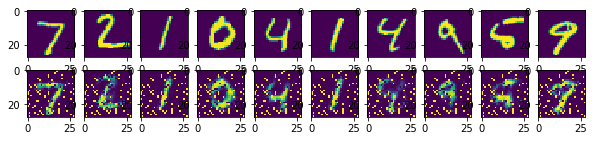

In [8]:
# 启动绘话
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())


    total_batch = int(mnist.train.num_examples/batch_size)
    # 开始训练
    for epoch in range(training_epochs):#迭代

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)#取数据
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs})# 训练模型
        if epoch % display_step == 0:# 现实日志信息
            print("Epoch:", '%04d' % (epoch+1),"cost=", "{:.9f}".format(c))

    print("完成!")


    # 可视化结果
    show_num = 10
    reconstruction = sess.run(
        pred, feed_dict={x: mnist.test.images[:show_num]})

    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(show_num):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(reconstruction[i], (28, 28)))
    plt.draw()